<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Assignment4/ThirdDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Third Neural Network**

#### This is the Second Neural Network  as noticed in this network I have added BatchNormalization, Dropout.The learning rate remain unchanged.




##Improvements over Second Network

####1) Added Batch Normalization 
#### 2)  Added DropOut
#### 3) Stopped at 7  *  7  convolution rather than  11 * 11  which is the case in the   previous network(This will reduce the number of parameters)

#### 4) The number of parameters reduced from 31K to 27K







#### The number of parameters are:  27,870

#### The batch size is : 32

#### The number of epochs run is :  20

#### The validation increased from    98.87 to 99.08





##Import Libraries and modules

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


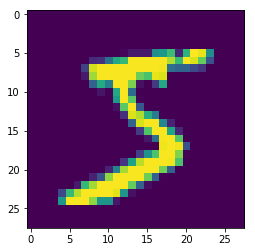

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [23]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  416/60000 [..............................] - ETA: 26s - loss: 0.0077 - acc: 0.9952

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 25s 410us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0372 - val_acc: 0.9900
Epoch 2/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0328 - val_acc: 0.9903
Epoch 3/20
60000/60000 [==============================] - 24s 405us/step - loss: 0.0156 - acc: 0.9946 - val_loss: 0.0293 - val_acc: 0.9919
Epoch 4/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.0174 - acc: 0.9938 - val_loss: 0.0322 - val_acc: 0.9903
Epoch 5/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.0158 - acc: 0.9948 - val_loss: 0.0276 - val_acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.0150 - acc: 0.9952 - val_loss: 0.0340 - val_acc: 0.9911
Epoch 7/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.0157 - acc: 0.9945 - val_loss: 0.0276 - val_acc: 0.9916
Epoch 8/20
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [30]:
print(score)

[0.034463047469785714, 0.9908]


In [0]:
y_pred = model.predict(X_test)

In [32]:
print(y_pred[:9])
print(y_test[:9])

[[3.3422337e-13 6.2070102e-12 3.2006446e-09 6.1603933e-10 3.4530066e-17
  1.0786958e-14 3.5180811e-22 1.0000000e+00 7.3329252e-15 9.5224240e-10]
 [1.0697595e-12 1.6303450e-09 1.0000000e+00 5.6749189e-17 5.7691255e-17
  8.3121601e-19 3.1346625e-10 3.6747949e-17 3.7334891e-14 1.0855201e-20]
 [3.4194843e-12 9.9999988e-01 6.9953005e-10 1.7724212e-13 9.9448929e-09
  1.0469072e-09 2.6254554e-10 1.5132188e-07 8.4790633e-11 3.1693797e-11]
 [9.9999976e-01 1.6549878e-11 2.3468611e-11 6.2831459e-16 3.8843858e-13
  5.1314131e-12 2.8178911e-07 8.5896975e-12 6.9134524e-12 1.8341728e-08]
 [3.9363054e-14 2.9522140e-10 5.4150900e-10 4.5374766e-13 9.9999142e-01
  2.2214835e-14 2.6739732e-11 6.0562249e-09 6.3511890e-10 8.5857209e-06]
 [6.7946211e-11 9.9999917e-01 9.7356398e-09 3.2319257e-14 3.3927485e-08
  1.7721245e-11 9.7595203e-11 8.1288169e-07 3.9947193e-10 2.4032759e-10]
 [1.8303228e-22 1.9373289e-11 3.8773244e-13 9.2028630e-19 9.9999988e-01
  1.1595473e-14 1.8206984e-15 2.1749158e-09 7.6103575e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

NameError: ignored